# DSCI-100 Project Planning Stage 

The purpose of this Data Science Project is to perform an analysis to answer a predictive question using the Minecraft server, PlaiCraft, dataset. Specifically, we'd like to better understand the details regarding player engagement and demographics. This dataset was collected by a research group in Computer Science at UBC to explore how people play video games. In this Project Planning Report, a brief data description, proposed question, exploratory data analysis and visualization will be presented along with a structured approach and plan. 

### Data Description

 The data being used on this project was collected by having indivudals play on UBC's research group's Mincraft served called PlaiCraft. The data collected consisted of information such as player experience, their session durations, and furthmore. The files we are presented with consists of players.csv and sessions.csv.

#### Players Dataset
The players.csv file contains information collected from the Minecraft server with 197 observations and 7 columns. Each observation is representative of a player. Please note that the players.csv dataset contains columns for "individualid" and "organizationName", which has blank fields and will be disregarded from this analysis for that purpose.


Further information about the dataset can be seen in the following table:

|  Variable Name | Variable Data Type |                          Description                                | 
|:--------------:|:------------------:|:-------------------------------------------------------------------:|
|  experience    |  Character         |   Describes if a player is a Pro, Veteran, Beginner or Amateur	    |  
|  subscribe     |  Logical           |   Denotes if a player has subscribed to PlaiCraft's email updates   |   
|  hashedEmail   |  Character         |   The hashed email for each player                                  |  
| played_hours   |  Double            |   The total number of hours a player has played                     |
|  name          |  Character         |   The player's alias                                                |  
|  gender        | Character          |   The player's gender, either male or female                        |  
|  age           |  Double            |   The player's age                                                  | 

Some potential issues with the "players.csv" dataset can involve misclassification in experience level. For example, the data collected inquires the individual for their experience level, however, it is unclear where the line is drawn between a pro and a veteran or a beginner and an amateur. The experience level may not be accurate to begin with, and so this will greatly affect the results of the analysis. 


#### Sessions Dataset
The sessions.csv file contains information collected from the Minecraft server with 1535 observations and 5 columns. Each observation is representative of a player's playing session, noting the start and end times of that session.
Further information about the dataset can be seen in the following table:

|  Variable Name       | Variable Data Type |                          Description                                | 
|:--------------------:|:------------------:|:-------------------------------------------------------------------:| 
|  hashedEmail         |  Character         |   The hashed email for each player                                  |  
|  start_time          |  Character         |   The player's actual start time of the session                     |
|  end_time            |  Character         |   The player's actual end time of the session                       |  
|  original_start_time |  Double            |   The player's scheduled start times in UNIX timestamp format       |  
|  original_end_time   |  Double            |   The player's scheduled end times in UNIX timestamp format         | 

The "sessions.csv" dataset contains start time and end times stored as character strings, which can lead to inconsistencies with the analysis. Translating the data into proper format may create inconsistencies. Furthermore, after inspection, it was noticed that the "original" start and end times in UNIX timestamp format are rounded. This does not yield useful information as the durations under an hour are reported as zero. This will be an issue in the analysis, and therefore, the start and end times in POSIXct format will have to be used. Although these values are stored as strings, they will have to be converted into their proper formats. Since there is a lack of context regarding how this data was collected, timezones may affect the outcomes of the analysis. How the timestamps are recorded and which timezones are used may make the data misleading.

### Question 
For this data analysis, the "kinds" of players will be explored in order to better understand player demographic for marketing and recruiting efforts. The response variable will be the time played as the age and experience can be used to identify which kinds of players play the most.

The data will be wrangled by combining the two datasets from the "players.csv" and "sessions.csv". Before doing so, I will correct the sessions dataset to capture the timestamps in correct data types and removing the recorded times in UNIX format. The durations from the sessions dateset can be then calculated and compared with the players dataset, which matches the player's session with the player characterisitics. By the end of the wrangling process, a clean a tidy dataset with columns player email, age, total time played, and experience level should be produced.

### Exploratory Data Analysis and Visualization

An exploratory data analysis was performed on the data and can be seen below. It was discovered that most players have identified as male between the ages 15 to 25. 

In [1]:
#run before starting 
library(tidyverse)
library(tidymodels)
library(repr)
library (lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_data <- read_csv ("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")|>
    select(-individualId, -organizationName)

head(players_data)
summary (players_data)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
     name              gender               age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.28  
                                       3rd Qu.:22.00  
                                       Max.   :99.00  

In [3]:
sessions_data <- read_csv ("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")

head(sessions_data)
summary(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [4]:
players_analysis_data <- sessions_data |> 
    mutate (start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
    mutate (end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"))|>
    mutate (converted_end_sec = as.numeric(as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"))) |>
    mutate (converted_start_sec = as.numeric(as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"))) |>
    mutate (duration = (converted_end_sec - converted_start_sec )/(60)) |>
    select (-original_start_time, -original_end_time)|>
    group_by (hashedEmail)|>
    summarize(total_duration_min = sum(duration))

In [5]:
combined_data <- left_join(players_data, players_analysis_data, by="hashedEmail") |>
    mutate(total_duration_min = replace_na(total_duration_min, 0)) |>
    mutate(id_number = row_number())|>
    select (id_number, everything(), - hashedEmail)

head(combined_data)

id_number,experience,subscribe,played_hours,name,gender,age,total_duration_min
<int>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,Pro,TRUE,30.3,Morgan,Male,9,2019
2,Veteran,TRUE,3.8,Christian,Male,17,255
3,Veteran,FALSE,0.0,Blake,Male,17,5
4,Amateur,TRUE,0.7,Flora,Female,21,50
5,Regular,TRUE,0.1,Kylie,Male,21,9
6,Amateur,TRUE,0.0,Adrian,Female,17,0


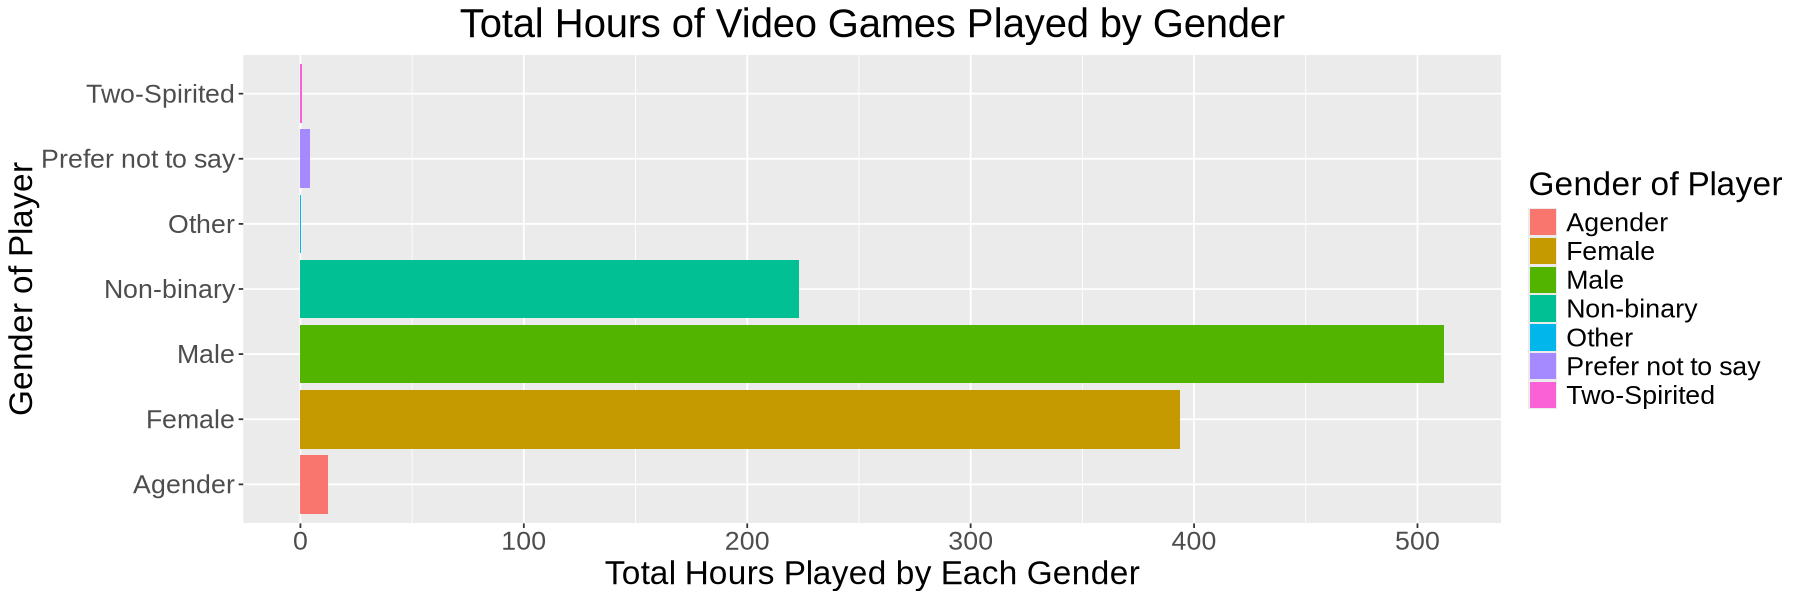

In [6]:
options(repr.plot.width = 15, repr.plot.height = 5)
bar_plot <- combined_data |>
    ggplot(aes (x = played_hours, y = gender, fill = gender)) +
    geom_bar(stat = "identity") +
    labs(title = "Total Hours of Video Games Played by Gender",
           y = "Gender of Player",
           x = "Total Hours Played by Each Gender", 
            fill = "Gender of Player") +
    theme(text = element_text(size=20)) +
    theme(plot.title = element_text(hjust = 0.5))
    
bar_plot

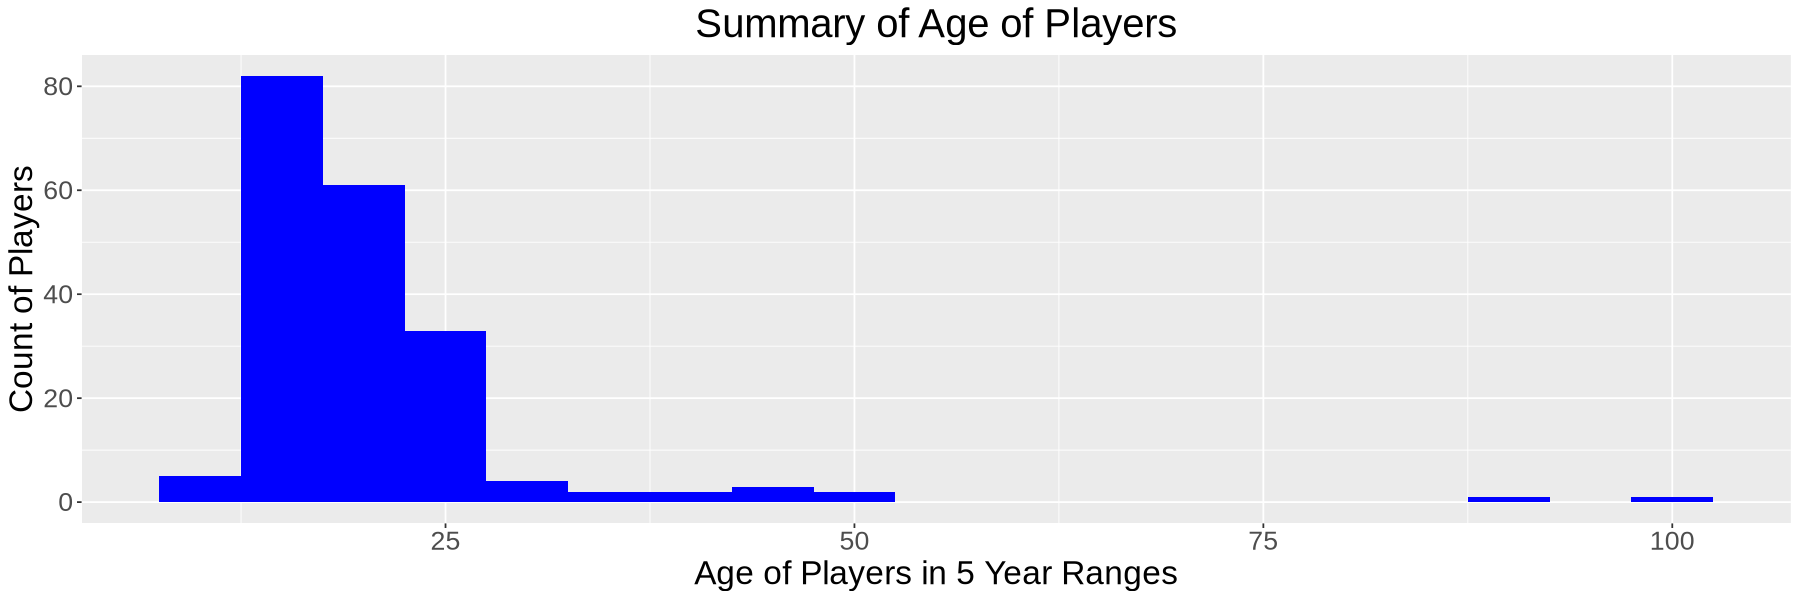

In [7]:
options(repr.plot.width = 15, repr.plot.height = 5)
bar_plot <- combined_data |>
    ggplot(aes (x = age)) +
    geom_histogram(binwidth = 5, fill = "blue") +
    labs(title = "Summary of Age of Players",
         y = "Count of Players",
         x = "Age of Players in 5 Year Ranges")+
    theme(text = element_text(size=20)) +
    theme(plot.title = element_text(hjust = 0.5))

bar_plot

Warning message:
“Removed 17 rows containing missing values or values outside the scale range
(`geom_point()`).”


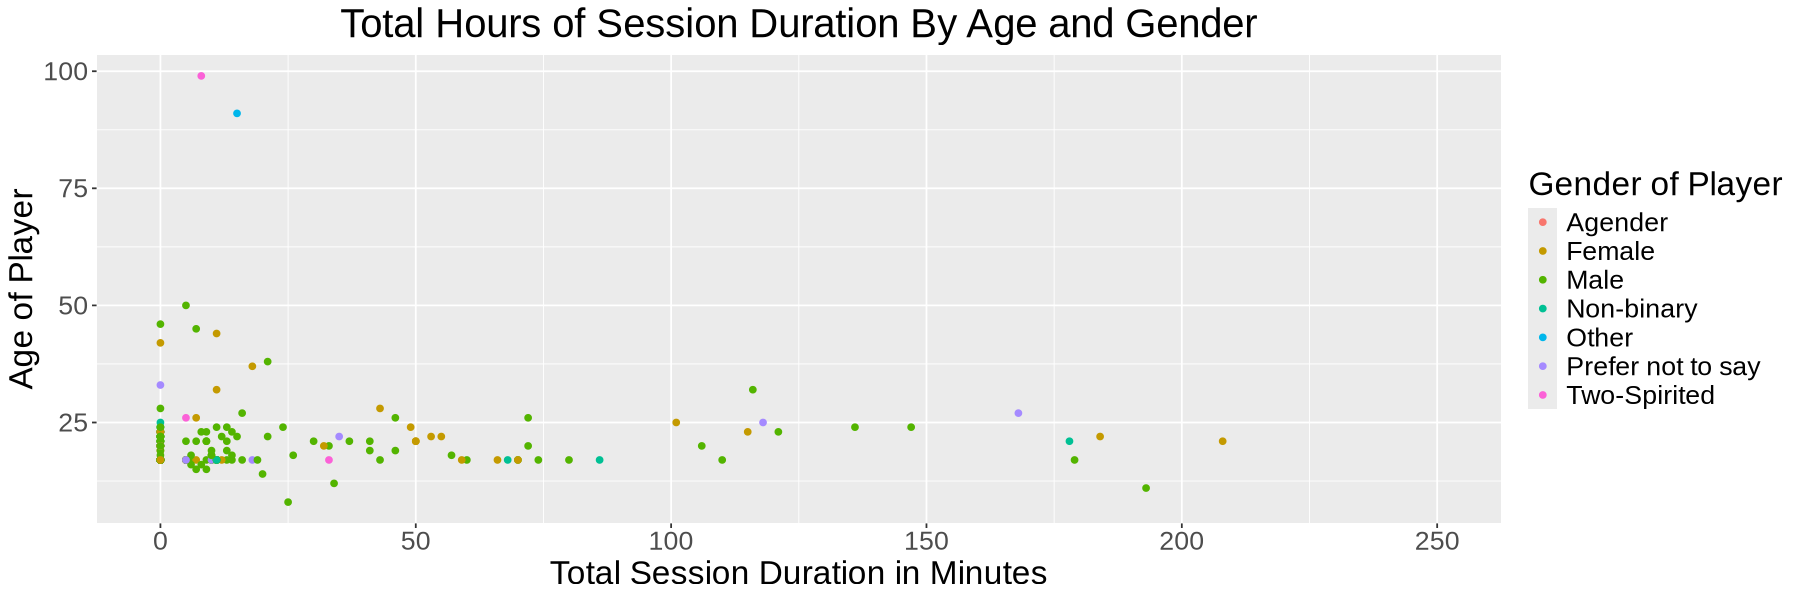

In [8]:
options(repr.plot.width = 15, repr.plot.height = 5)
scatter <- combined_data |>
    ggplot(aes (x = total_duration_min, y = age, color = gender)) +
    geom_point()+
    xlim(0,250)+
    labs(title = "Total Hours of Session Duration By Age and Gender",
           y = "Age of Player",
           x = "Total Session Duration in Minutes",
           colour = "Gender of Player") +
    theme(text = element_text(size=20)) + 
    theme(plot.title = element_text(hjust = 0.5))

scatter

### Methods and Plan

The method will be regression using k-nearest neighbours because we are aiming to predict the play time with age being the predictor. 
It is appropriate as there are no assumptions about the distribution or linearity of the data. The method is also suitable for smaller datasets. 
The choice of predictors is an assumption as it is assumed that age will have a direct correlation with play time. Other predictors will have to further explored as well. 
The potential limitations is that the data may be sensitive to noise as this is a small dataset. This may affect the results of the anaylsis. 
Cross-validation will be used with 5-folds to determine the best model for selection. The data will be split 70% for training and 30% for validation. This data will be split at the very beginning to ensure that we are not producing a biased model. The data will first be reordered and randomized before splitting. 